## 인물사진을 만들어 보자

진행과정 정리
1. 이미지 불러오기
2. 피사체 분리 (image segmentation으로 사람만 분리해내자)
3. 배경 흐리게
4. 이미지 합성

In [9]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(264, 300, 3)


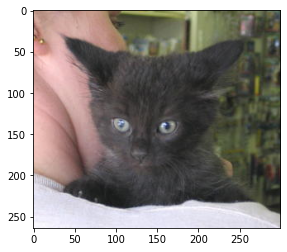

In [2]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat.jpeg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7a624ebdd280>)

In [4]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [6]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

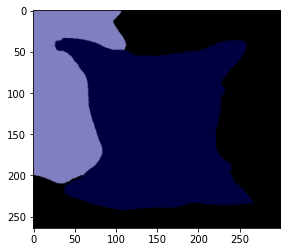

In [7]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [8]:
segvalues # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0,  8, 15]),
 'masks': array([[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [9]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
person


In [10]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

# 컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15]

array([192, 128, 128])

In [12]:
colormap[8] # 고양이

array([64,  0,  0])

In [13]:
seg_color = (0,0,64) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

(264, 300)


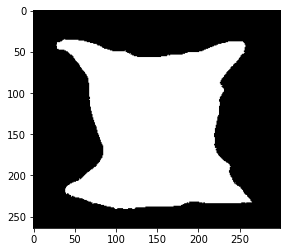

In [14]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

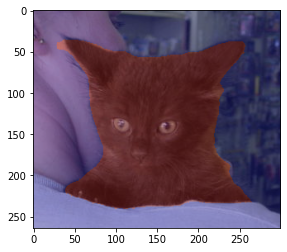

In [15]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 배경 흐리게하기

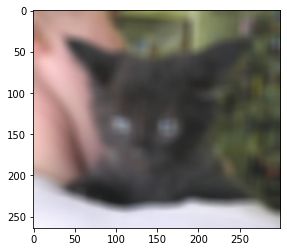

In [16]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

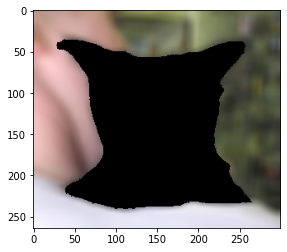

In [17]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

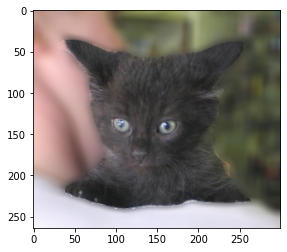

In [18]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

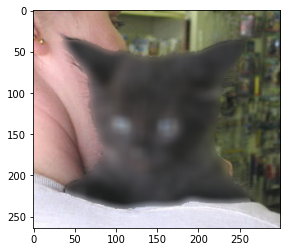

In [19]:
# Q. 이번에는 고양이 부분을 블러로, 배경 부분을 원본으로 출력해볼까요?
# 힌트 : img_mask_color 옵션을 적절히 조정해주고, img_orig, img_orig_blur 를 활용하세요.
img_concat = np.where(img_mask_color!=255, img_orig, img_orig_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 프로젝트: 인물 모드 문제점 찾기

In [20]:
seg_color = (128, 128, 192)

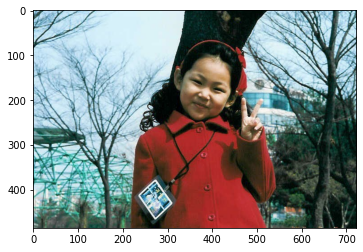

In [21]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_img.JPG'  
img_orig = cv2.imread(img_path) 
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [23]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 

# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

In [24]:
# 원본 이미지와 마스크를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

## 배경 흐리게하기

# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13)) 

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
# plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
# plt.show()

# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)


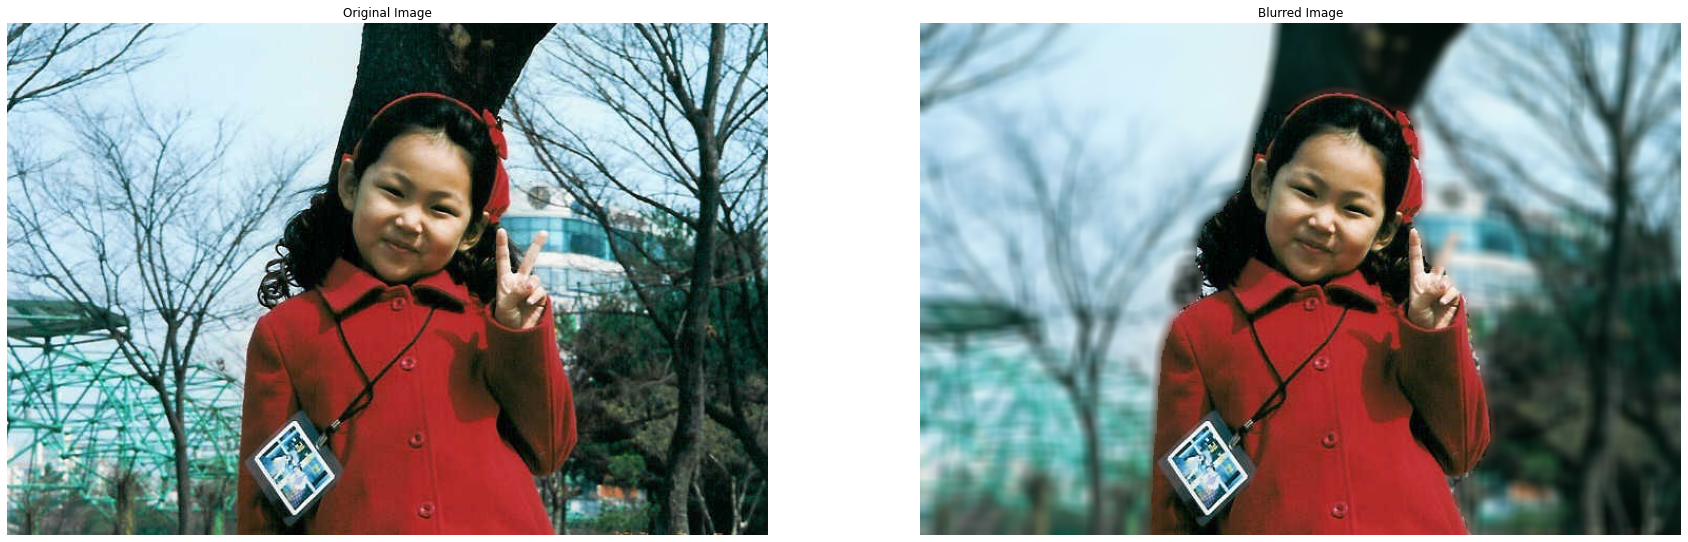

In [25]:
fig = plt.figure(figsize=(30, 40))
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
ax2.set_title('Blurred Image')
ax2.axis("off")
 
plt.show()

In [26]:
# img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_img_blured.jpeg'  
# img_orig = cv2.imread(img_path) 
# plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
# plt.axis('off')
# plt.show()

![img_blur](images/my_img_blured.png)


- V포즈를 한 바깥 손가락이 같이 블러처리 되어버렸다
- 파마머리도 약간 잘린 것을 볼 수 있다
- segmentation 나누는 경계를 부드럽게 처리하면서 된 결과같다

## 다른 이미지 실험

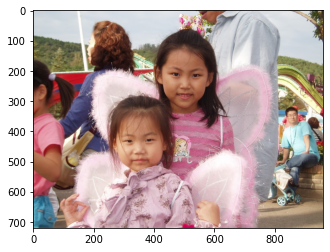

In [27]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_img2.JPG'  
img_orig = cv2.imread(img_path) 
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [28]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [29]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [30]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 

# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

In [31]:
# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

## 배경 흐리게하기

# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13)) 

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
# plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
# plt.show()

# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)


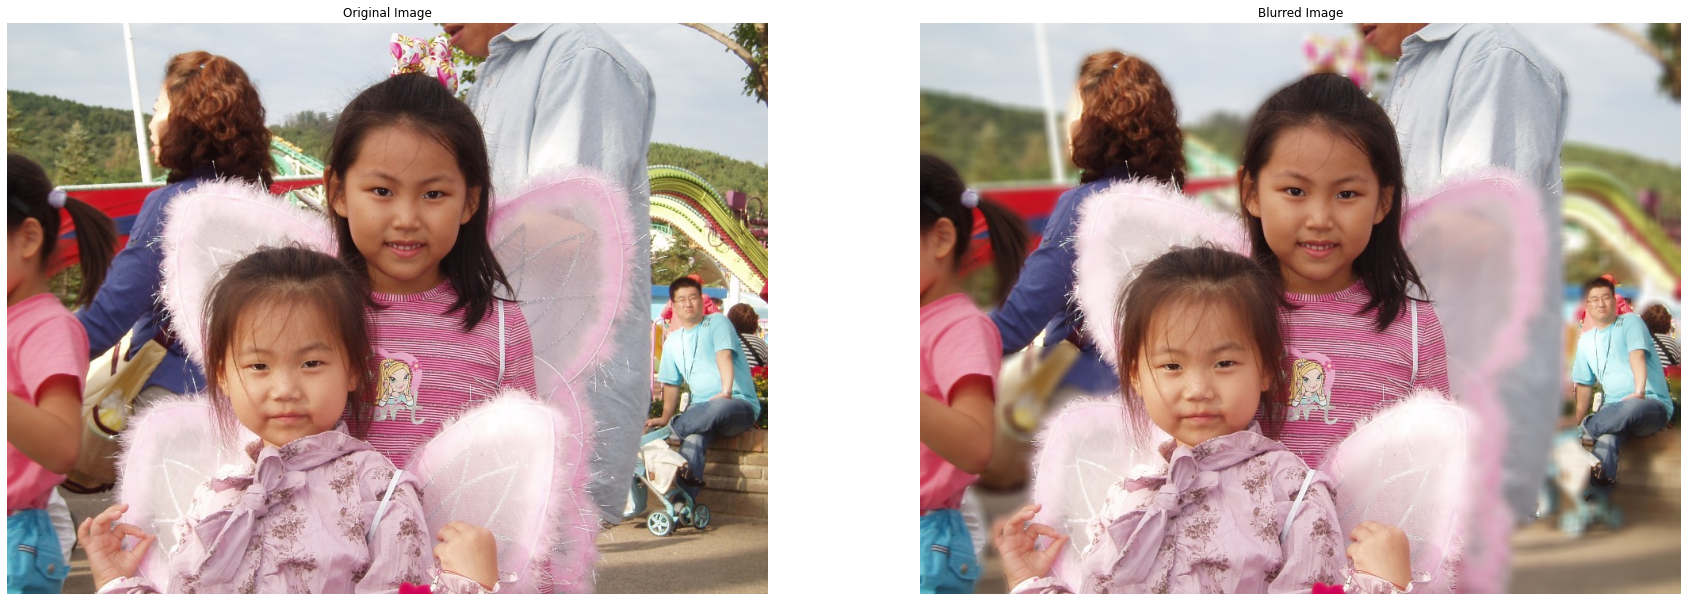

In [32]:
fig = plt.figure(figsize=(30, 40))
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image')
ax1.axis("off")
 
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
ax2.set_title('Blurred Image')
ax2.axis("off")
 
plt.show()

![img_blur2](images/my_img2_blured.png)

- 중심인물을 제외하고 흐리게 처리해야하는데 주변에 사람이 많으면 포커스가 안잡히는 것으로 보인다
- 날개 같은 것들은 잘 나눠지지 않는 것 같다

### 해결방안

- 위 문제를 해결하기위해서는 instance segmentation을 해야한다

In [33]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_img2.JPG'   
segvalues, output = model.segmentAsPascalvoc(img_path)

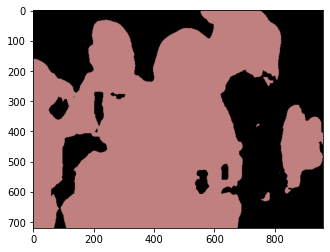

In [34]:
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.show()

- 위처럼 semantic segmentation을 하게되면 '사람'을 다 흐리게 처리하지 않기 때문에 instance segmentation을 통해 중심인물을 찾아야 한다

In [35]:
import pixellib
from pixellib.instance import instance_segmentation
import cv2
import os

# 모델 파일 경로 설정
model_dir = os.getenv('HOME') + '/aiffel/human_segmentation/models'
os.makedirs(model_dir, exist_ok=True)
model_file = os.path.join(model_dir, 'mask_rcnn_coco.h5')

# 모델 파일 URL
model_url = 'https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5'

# 모델 다운로드
if not os.path.exists(model_file):
    urllib.request.urlretrieve(model_url, model_file)

# PixelLib의 instance_segmentation 객체 생성
segment_image = instance_segmentation()
segment_image.load_model(model_file)

Instructions for updating:
Use fn_output_signature instead


In [36]:
# 모든 클래스에 대한 딕셔너리 생성, 'person' 클래스만 활성화
target_classes = {
    "BG": "invalid",
    "person": True,
    "bicycle": "invalid",
    "car": "invalid",
    "motorcycle": "invalid",
    "airplane": "invalid",
    "bus": "invalid",
    "train": "invalid",
    "truck": "invalid",
    "boat": "invalid",
    "traffic light": "invalid",
    "fire hydrant": "invalid",
    "stop sign": "invalid",
    "parking meter": "invalid",
    "bench": "invalid",
    "bird": "invalid",
    "cat": "invalid",
    "dog": "invalid",
    "horse": "invalid",
    "sheep": "invalid",
    "cow": "invalid",
    "elephant": "invalid",
    "bear": "invalid",
    "zebra": "invalid",
    "giraffe": "invalid",
    "backpack": "invalid",
    "umbrella": "invalid",
    "handbag": "invalid",
    "tie": "invalid",
    "suitcase": "invalid",
    "frisbee": "invalid",
    "skis": "invalid",
    "snowboard": "invalid",
    "sports ball": "invalid",
    "kite": "invalid",
    "baseball bat": "invalid",
    "baseball glove": "invalid",
    "skateboard": "invalid",
    "surfboard": "invalid",
    "tennis racket": "invalid",
    "bottle": "invalid",
    "wine glass": "invalid",
    "cup": "invalid",
    "fork": "invalid",
    "knife": "invalid",
    "spoon": "invalid",
    "bowl": "invalid",
    "banana": "invalid",
    "apple": "invalid",
    "sandwich": "invalid",
    "orange": "invalid",
    "broccoli": "invalid",
    "carrot": "invalid",
    "hot dog": "invalid",
    "pizza": "invalid",
    "donut": "invalid",
    "cake": "invalid",
    "chair": "invalid",
    "couch": "invalid",
    "potted plant": "invalid",
    "bed": "invalid",
    "dining table": "invalid",
    "toilet": "invalid",
    "tv": "invalid",
    "laptop": "invalid",
    "mouse": "invalid",
    "remote": "invalid",
    "keyboard": "invalid",
    "cell phone": "invalid",
    "microwave": "invalid",
    "oven": "invalid",
    "toaster": "invalid",
    "sink": "invalid",
    "refrigerator": "invalid",
    "book": "invalid",
    "clock": "invalid",
    "vase": "invalid",
    "scissors": "invalid",
    "teddy bear": "invalid",
    "hair drier": "invalid",
    "toothbrush": "invalid"
}

In [37]:
# 이미지 파일 경로
image_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_img2.JPG' 
output_path = 'output_image.jpg'  # 출력 이미지 경로

/opt/conda/lib/python3.9/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


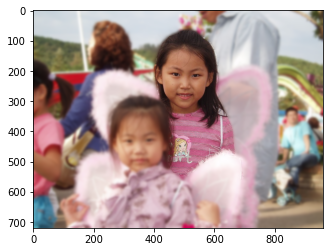

Segmentation with blurred background completed. Output saved at: output_image.jpg


In [38]:
# 이미지에서 사람 인스턴스 세그멘테이션 수행
segmask, output = segment_image.segmentImage(
    image_path,
    show_bboxes=True,
    segment_target_classes=target_classes
)

# 원본 이미지 로드
image = cv2.imread(image_path)

# 중심 인물 찾기
height, width, _ = image.shape
image_center = np.array([width // 2, height // 2])

min_distance = float('inf')
center_person_index = -1

# 각 객체의 바운딩 박스 중심 좌표 계산 및 가장 중심에 가까운 객체 찾기
for i, box in enumerate(segmask['rois']):
    y1, x1, y2, x2 = box
    person_center = np.array([(x1 + x2) / 2, (y1 + y2) / 2])
    distance = np.linalg.norm(person_center - image_center)
    if distance < min_distance:
        min_distance = distance
        center_person_index = i

# 중심 인물 마스크
if center_person_index != -1:
    center_person_mask = segmask['masks'][:, :, center_person_index]

    # 중심 인물 외 부분을 흐리게 처리
    blurred_image = cv2.GaussianBlur(image, (21, 21), 0)
    masked_image = np.where(center_person_mask[:, :, None], image, blurred_image)

    # 결과 저장
    cv2.imwrite(output_path, masked_image)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.show()

    print("Segmentation with blurred background completed. Output saved at:", output_path)
else:
    print("No person detected in the image.")

<!-- ![output](output_image.jpg) -->

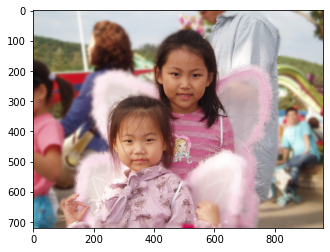

Segmentation with blurred background completed. Output saved at: output_image2.jpg


In [39]:
output_path = 'output_image2.jpg'
# 중심 인물 마스크와 겹치는 모든 사람 마스크 합치기
if center_person_index != -1:
    center_person_mask = segmask['masks'][:, :, center_person_index]

    combined_mask = np.zeros_like(center_person_mask)
    combined_mask = np.logical_or(combined_mask, center_person_mask)

    for i, box in enumerate(segmask['rois']):
        if i == center_person_index:
            continue
        other_person_mask = segmask['masks'][:, :, i]
        overlap = np.logical_and(center_person_mask, other_person_mask).any()
        if overlap:
            combined_mask = np.logical_or(combined_mask, other_person_mask)

    # 중심 인물과 겹치는 부분 외 나머지를 흐리게 처리
    blurred_image = cv2.GaussianBlur(image, (21, 21), 0)
    masked_image = np.where(combined_mask[:, :, None], image, blurred_image)

    # 결과 저장
    cv2.imwrite(output_path, masked_image)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.show()

    print("Segmentation with blurred background completed. Output saved at:", output_path)
else:
    print("No person detected in the image.")

![img3](images/img3.png)

- 이번에는 중심인물과 붙어있는 사람들을 인식했지만 얼굴이 없는 사람도 같이 인식되는 문제가 생겼다
- OpenCV의 얼굴 검출 기능을 사용하여 OpenCV의 CascadeClassifier를 사용하여 각 인물의 얼굴을 검출하고, 얼굴이 검출된 인물만을 포함하는 마스크를 생성해보자

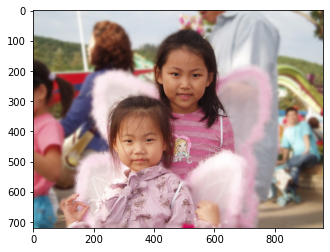

Segmentation with blurred background completed. Output saved at: output_image2.jpg


In [40]:
# 원본 이미지 로드
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 얼굴 검출기 초기화
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 중심 인물 찾기
height, width, _ = image.shape
image_center = np.array([width // 2, height // 2])

min_distance = float('inf')
center_person_index = -1

# 각 객체의 바운딩 박스 중심 좌표 계산 및 가장 중심에 가까운 객체 찾기
for i, box in enumerate(segmask['rois']):
    y1, x1, y2, x2 = box
    person_center = np.array([(x1 + x2) / 2, (y1 + y2) / 2])
    distance = np.linalg.norm(person_center - image_center)
    if distance < min_distance:
        min_distance = distance
        center_person_index = i

# 중심 인물 마스크와 겹치는 모든 사람 마스크 합치기
if center_person_index != -1:
    center_person_mask = segmask['masks'][:, :, center_person_index]

    combined_mask = np.zeros_like(center_person_mask)
    combined_mask = np.logical_or(combined_mask, center_person_mask)

    # 중심 인물의 얼굴 검출
    center_person_faces = face_cascade.detectMultiScale(
        gray_image[segmask['rois'][center_person_index][0]:segmask['rois'][center_person_index][2], 
                   segmask['rois'][center_person_index][1]:segmask['rois'][center_person_index][3]]
    )

    # 중심 인물과 얼굴이 있는 사람들의 마스크 합치기
    if len(center_person_faces) > 0:  # 중심 인물의 얼굴이 검출되었을 경우
        for i, box in enumerate(segmask['rois']):
            if i == center_person_index:
                continue
            other_person_mask = segmask['masks'][:, :, i]
            overlap = np.logical_and(center_person_mask, other_person_mask).any()
            if overlap:
                # 다른 사람의 얼굴 검출
                other_person_faces = face_cascade.detectMultiScale(
                    gray_image[box[0]:box[2], box[1]:box[3]]
                )
                if len(other_person_faces) > 0:  # 다른 사람의 얼굴이 검출되었을 경우
                    combined_mask = np.logical_or(combined_mask, other_person_mask)

    # 중심 인물과 얼굴이 있는 사람들 외 나머지를 흐리게 처리
    blurred_image = cv2.GaussianBlur(image, (21, 21), 0)
    masked_image = np.where(combined_mask[:, :, None], image, blurred_image)

    # 결과 저장
    cv2.imwrite(output_path, masked_image)
    plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    plt.show()

    print("Segmentation with blurred background completed. Output saved at:", output_path)
else:
    print("No person detected in the image.")

In [41]:
def make_segmask(image_path, target_classes):
    # 이미지에서 사람 인스턴스 세그멘테이션 수행
    segmask, output = segment_image.segmentImage(
        image_path,
        show_bboxes=True,
        segment_target_classes=target_classes
    )

    # 원본 이미지 로드
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 얼굴 검출기 초기화
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # 중심 인물 찾기
    height, width, _ = image.shape
    image_center = np.array([width // 2, height // 2])

    min_distance = float('inf')
    center_person_index = -1

    # 각 객체의 바운딩 박스 중심 좌표 계산 및 가장 중심에 가까운 객체 찾기
    for i, box in enumerate(segmask['rois']):
        y1, x1, y2, x2 = box
        person_center = np.array([(x1 + x2) / 2, (y1 + y2) / 2])
        distance = np.linalg.norm(person_center - image_center)
        if distance < min_distance:
            min_distance = distance
            center_person_index = i

    # 중심 인물 마스크와 겹치는 모든 사람 마스크 합치기
    if center_person_index != -1:
        center_person_mask = segmask['masks'][:, :, center_person_index]

        combined_mask = np.zeros_like(center_person_mask)
        combined_mask = np.logical_or(combined_mask, center_person_mask)

        # 중심 인물의 얼굴 검출
        center_person_faces = face_cascade.detectMultiScale(
            gray_image[segmask['rois'][center_person_index][0]:segmask['rois'][center_person_index][2], 
                       segmask['rois'][center_person_index][1]:segmask['rois'][center_person_index][3]]
        )

        # 중심 인물과 얼굴이 있는 사람들의 마스크 합치기
        if len(center_person_faces) > 0:  # 중심 인물의 얼굴이 검출되었을 경우
            for i, box in enumerate(segmask['rois']):
                if i == center_person_index:
                    continue
                other_person_mask = segmask['masks'][:, :, i]
                overlap = np.logical_and(center_person_mask, other_person_mask).any()
                if overlap:
                    # 다른 사람의 얼굴 검출
                    other_person_faces = face_cascade.detectMultiScale(
                        gray_image[box[0]:box[2], box[1]:box[3]]
                    )
                    if len(other_person_faces) > 0:  # 다른 사람의 얼굴이 검출되었을 경우
                        combined_mask = np.logical_or(combined_mask, other_person_mask)

        # 중심 인물과 얼굴이 있는 사람들 외 나머지를 흐리게 처리
        blurred_image = cv2.GaussianBlur(image, (21, 21), 0)
        masked_image = np.where(combined_mask[:, :, None], image, blurred_image)

        # 결과 저장
        cv2.imwrite(output_path, masked_image)
        plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
        plt.show()

        print("Segmentation with blurred background completed. Output saved at:", output_path)
    else:
        print("No person detected in the image.")

In [42]:
# 이미지 파일 경로
image_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog_person.jpeg' 
output_path = 'output3.jpg'

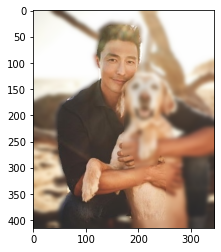

Segmentation with blurred background completed. Output saved at: output3.jpg


In [43]:
make_segmask(image_path, target_classes)

![img3](images/img4.png)

- 이렇게 사람 인스턴스를 찾아내는 식으로 구현하면 사람이 동물을 안고 있는 사진의 경우 동물이 흐리게 되어버리는 문제가 발생한다.

## 사람이 아닌 모든 중심 객체를 포커스하는 방식으로 수정

In [44]:
def get_focus_img(image_path, output_path=None):
    # 이미지에서 인스턴스 세그멘테이션 수행
    segmask, output = segment_image.segmentImage(
        image_path,
        show_bboxes=True
    )

    # 원본 이미지 로드
    image = cv2.imread(image_path)

    # 중심 객체 찾기
    height, width, _ = image.shape
    image_center = np.array([width // 2, height // 2])

    min_distance = float('inf')
    center_object_index = -1

    # 각 객체의 바운딩 박스 중심 좌표 계산 및 가장 중심에 가까운 객체 찾기
    for i, box in enumerate(segmask['rois']):
        y1, x1, y2, x2 = box
        object_center = np.array([(x1 + x2) / 2, (y1 + y2) / 2])
        distance = np.linalg.norm(object_center - image_center)
        if distance < min_distance:
            min_distance = distance
            center_object_index = i

    # 중심 객체 마스크와 겹치는 모든 객체 마스크 합치기
    if center_object_index != -1:
        center_object_mask = segmask['masks'][:, :, center_object_index]

        combined_mask = np.zeros_like(center_object_mask)
        combined_mask = np.logical_or(combined_mask, center_object_mask)

        for i, box in enumerate(segmask['rois']):
            if i == center_object_index:
                continue
            other_object_mask = segmask['masks'][:, :, i]
            overlap = np.logical_and(center_object_mask, other_object_mask).any()
            if overlap:
                combined_mask = np.logical_or(combined_mask, other_object_mask)

        # 중심 객체와 겹치는 부분 외 나머지를 흐리게 처리
        blurred_image = cv2.GaussianBlur(image, (21, 21), 0)
        masked_image = np.where(combined_mask[:, :, None], image, blurred_image)

        # 결과 시각화
        plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # 결과 저장
        if output_path != None:
            cv2.imwrite(output_path, masked_image)
            print("Segmentation with blurred background completed. Output saved at:", output_path)
        
    else:
        print("No object detected in the image.")

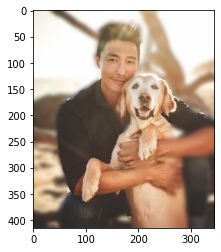

In [45]:
image_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog_person.jpeg'
get_focus_img(image_path, output_path=None)

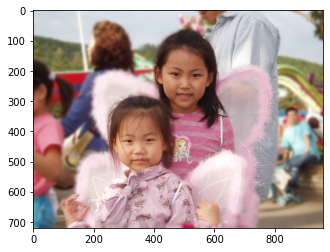

In [46]:
image_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_img2.JPG' 
get_focus_img(image_path, output_path=None)

- 위 코드를 이용해 다시 기존 이미지를 수행해본 결과 강아지가 흐리게 되는 문제는 수정이 되었다
- 하지만 뒤에 있는 배경인물들이 다시 흐리게 처리되지 않는 문제가 발생했다
- 다시 얼굴인식 코드를 추가해주어야 할 것으로 보인다

## 최종 수정 코드

- semantic segmentation으로 하게 되면 인물 사진을 인식할때 사람이 많은 상황에서 잘 작동하지 않는 문제가 있었다.
    - 이에 따라 instance segmentation 방식으로 변경하고 중심인물과 그 주변인물 만을 포커스하도록 방식을 수정해보았다.
    - 그렇게 하면 이번에는 중심인물과 연결된 배경인물들도 포커스가 잡히는 문제가 있었다.
    - 주변인물들은 얼굴이 인식되지 않는다는 가정하에 얼굴을 인식하는 부분을 추가하였고 얼굴이 인식되지 않는 사람들의 마스크는 제거하였다.

- 최종적으로 날개까지 흐리게 처리되는 아쉬움이 있지만 날개를 흐리게 처리하지 않도록 수정을 하다보면 다른 사진에서 더 많은 오류가 생길 것으로 보이기에 이 부분은 아쉽지만 수정을 하지 않고 마무리하였다

In [47]:
import pixellib
from pixellib.instance import instance_segmentation
import cv2
import os
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

# 모델 파일 경로 설정
model_dir = os.getenv('HOME') + '/aiffel/human_segmentation/models'
os.makedirs(model_dir, exist_ok=True)
model_file = os.path.join(model_dir, 'mask_rcnn_coco.h5')

# 모델 파일 URL
model_url = 'https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5'

# 모델 다운로드
if not os.path.exists(model_file):
    urllib.request.urlretrieve(model_url, model_file)

# PixelLib의 instance_segmentation 객체 생성
segment_image = instance_segmentation()
segment_image.load_model(model_file)

# 얼굴 검출기 초기화
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [48]:
def get_focus_img(image_path, output_path=None):
    # 이미지에서 인스턴스 세그멘테이션 수행
    segmask, output = segment_image.segmentImage(
        image_path,
        show_bboxes=True
    )

    # 원본 이미지 로드
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 중심 객체 찾기
    height, width, _ = image.shape
    image_center = np.array([width // 2, height // 2])

    min_distance = float('inf')
    center_object_index = -1

    # 각 객체의 바운딩 박스 중심 좌표 계산 및 가장 중심에 가까운 객체 찾기
    for i, box in enumerate(segmask['rois']):
        y1, x1, y2, x2 = box
        object_center = np.array([(x1 + x2) / 2, (y1 + y2) / 2])
        distance = np.linalg.norm(object_center - image_center)
        if distance < min_distance:
            min_distance = distance
            center_object_index = i

    # 중심 객체 마스크와 겹치는 모든 객체 마스크 합치기
    if center_object_index != -1:
        center_object_mask = segmask['masks'][:, :, center_object_index]

        combined_mask = np.zeros_like(center_object_mask)
        combined_mask = np.logical_or(combined_mask, center_object_mask)

        # 중심 객체와 겹치는 다른 객체들 중 사람 객체에 대해 얼굴 검출 수행
        for i, box in enumerate(segmask['rois']):
            if i == center_object_index:
                continue
            other_object_mask = segmask['masks'][:, :, i]
            overlap = np.logical_and(center_object_mask, other_object_mask).any()
            
            # 겹치는 객체를 가져온다
            if overlap:
                if segmask['class_ids'][i] == 1:  # 사람 객체인 경우
                    y1, x1, y2, x2 = box
                    face = face_cascade.detectMultiScale(
                        gray_image[y1:y2, x1:x2]
                    )
                    # 얼굴이 검출된다면 합쳐준다
                    if len(face) > 0: 
                        combined_mask = np.logical_or(combined_mask, other_object_mask)
                else: # 사람이외의 객체는 얼굴 검출을 하지 않고 연결해준다
                    combined_mask = np.logical_or(combined_mask, other_object_mask)

                    
        # 중심 객체와 겹치는 부분 외 나머지를 흐리게 처리
        blurred_image = cv2.GaussianBlur(image, (21, 21), 0)
        masked_image = np.where(combined_mask[:, :, None], image, blurred_image)

        # 결과 시각화
        plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # 결과 저장
        if output_path != None:
            cv2.imwrite(output_path, masked_image)
            print("Segmentation with blurred background completed. Output saved at:", output_path)
        
    else:
        print("No object detected in the image.")

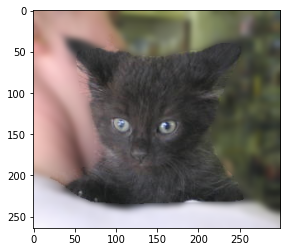

In [49]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/cat.jpeg'
get_focus_img(img_path)

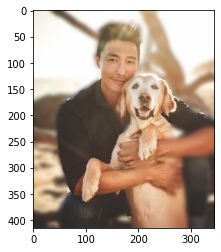

In [50]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog_person.jpeg' 
get_focus_img(img_path)

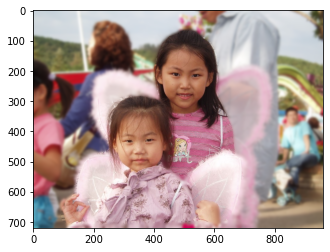

In [51]:
image_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_img2.JPG' 
get_focus_img(image_path)

### 아쉬운점
- 머리카락이나 손가락 같은 세밀한 부분에서 잘 나눠지지 않는 문제를 아직 해결하지 못해서 아쉽다

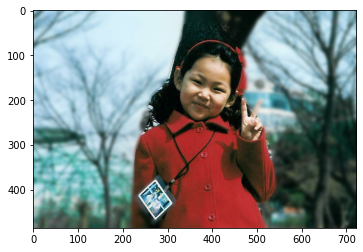

In [52]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/my_img.JPG' 
get_focus_img(img_path)

### 이에 대해 찾아본 해결책
1. 후처리 기법
- CRF (Conditional Random Fields)
- Morphological Operations

2. Attention Mechanisms:
- Attention 메커니즘을 사용하면 모델이 중요한 경계 부분에 집중할 수 있어 경계가 더 날카로워질 수 있다고 함

3. Multi-Scale Features: 
- 다양한 크기의 피쳐를 결합하여 세그멘테이션을 수행하면 작은 디테일도 잘 잡아낼 수 있다. 
- 예를 들어, FPN (Feature Pyramid Network)을 사용하는 방법

4. Loss Function 개선:

- Boundary Loss: 경계 영역에서의 손실을 더 많이 고려하는 Boundary Loss를 사용하면 경계가 더 날카롭게 될 수 있음
- Dice Loss 또는 IoU Loss: 주로 객체의 영역에 집중하는 Cross-Entropy Loss 대신 Dice Loss나 IoU Loss를 사용하면 더 나은 결과를 얻을 수 있음

## 후처리 기법

### Morphological Operations

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import binary_erosion, binary_dilation

# Post-processing function to refine the combined mask
def post_process_mask(combined_mask):
    # Perform morphological operations (erosion and dilation) to refine the mask
    combined_mask = binary_erosion(combined_mask, np.ones((2, 2)))
    combined_mask = binary_dilation(combined_mask, np.ones((2, 2)))

    return combined_mask


In [55]:
def get_focus_img2(image_path, output_path=None):
    # 이미지에서 인스턴스 세그멘테이션 수행
    segmask, output = segment_image.segmentImage(
        image_path,
        show_bboxes=True
    )

    # 원본 이미지 로드
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 중심 객체 찾기
    height, width, _ = image.shape
    image_center = np.array([width // 2, height // 2])

    min_distance = float('inf')
    center_object_index = -1

    # 각 객체의 바운딩 박스 중심 좌표 계산 및 가장 중심에 가까운 객체 찾기
    for i, box in enumerate(segmask['rois']):
        y1, x1, y2, x2 = box
        object_center = np.array([(x1 + x2) / 2, (y1 + y2) / 2])
        distance = np.linalg.norm(object_center - image_center)
        if distance < min_distance:
            min_distance = distance
            center_object_index = i

    # 중심 객체 마스크와 겹치는 모든 객체 마스크 합치기
    if center_object_index != -1:
        center_object_mask = segmask['masks'][:, :, center_object_index]

        combined_mask = np.zeros_like(center_object_mask)
        combined_mask = np.logical_or(combined_mask, center_object_mask)

        # 중심 객체와 겹치는 다른 객체들 중 사람 객체에 대해 얼굴 검출 수행
        for i, box in enumerate(segmask['rois']):
            if i == center_object_index:
                continue
            other_object_mask = segmask['masks'][:, :, i]
            overlap = np.logical_and(center_object_mask, other_object_mask).any()
            
            # 겹치는 객체를 가져온다
            if overlap:
                if segmask['class_ids'][i] == 1:  # 사람 객체인 경우
                    y1, x1, y2, x2 = box
                    face = face_cascade.detectMultiScale(
                        gray_image[y1:y2, x1:x2]
                    )
                    # 얼굴이 검출된다면 합쳐준다
                    if len(face) > 0: 
                        combined_mask = np.logical_or(combined_mask, other_object_mask)
                else: # 사람이외의 객체는 얼굴 검출을 하지 않고 연결해준다
                    combined_mask = np.logical_or(combined_mask, other_object_mask)

        
        # 중심 객체와 겹치는 부분의 마스크를 후처리
        post_processed_mask = post_process_mask(combined_mask)            
        
        
        # 중심 객체와 겹치는 부분 외 나머지를 흐리게 처리
        blurred_image = cv2.GaussianBlur(image, (21, 21), 0)
        masked_image = np.where(post_processed_mask[:, :, None], image, blurred_image)

        # 결과 시각화
        plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
        plt.show()
        
        # 결과 저장
        if output_path != None:
            cv2.imwrite(output_path, masked_image)
            print("Segmentation with blurred background completed. Output saved at:", output_path)
        
    else:
        print("No object detected in the image.")

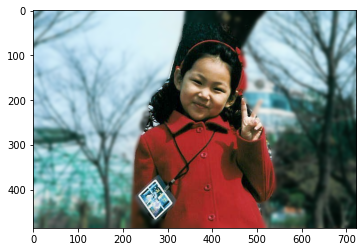

In [56]:
get_focus_img2(img_path)

- 딱히 변화 없음

## Dense CRF 적용 

![crf](fcCRF.png)

- 이 방식을 적용하면 원하는 대로 좀 더 세밀하게 수정이 될 것으로 보인다
- 하지만 시간이 오래 걸리는 문제가 있다

### CRF 공식
![crf](crf.png)

In [1]:
import os
import urllib
import cv2
import tensorflow as tf
import pixellib
from pixellib.semantic import semantic_segmentation
import numpy as np
import matplotlib.pyplot as plt
from pydensecrf.densecrf import DenseCRF2D
from pydensecrf.utils import unary_from_labels

In [13]:
# CRF 후처리 함수
def apply_crf(original_image, segmentation_mask):
    # 이미지 크기 조정
    original_image_resized = cv2.resize(original_image, (segmentation_mask.shape[1], segmentation_mask.shape[0]))

    # CRF 모델 생성
    n_labels = 2  # foreground와 background 라벨 개수
    d = DenseCRF2D(segmentation_mask.shape[1], segmentation_mask.shape[0], n_labels)

    # unary potential 생성
    segmentation_mask = (segmentation_mask / 255).astype(np.uint8)  # Normalize mask to [0, 1]
    # Add 1 to the mask to make the labels 1 and 2 instead of 0 and 1
    segmentation_mask += 1

    # Generate unary potentials
    unary = unary_from_labels(segmentation_mask, n_labels, gt_prob=0.7)

    # unary potential 설정
    d.setUnaryEnergy(unary)

    # 이미지에 대한 pairwise potential 추가
    d.addPairwiseGaussian(sxy=3, compat=3)  # Gaussian pairwise potential 파라미터 조정
    d.addPairwiseBilateral(sxy=80, srgb=13, rgbim=original_image_resized, compat=10)  # Bilateral pairwise potential 파라미터 조정

    # CRF를 수행하여 결과 반환
    Q = d.inference(5)
    result = np.argmax(Q, axis=0).reshape(segmentation_mask.shape)

    # Subtract 1 to revert labels back to 0 and 1
    return result - 1

In [3]:
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x782993c1fe20>)

In [ ]:
# 모델 초기화
segment_image = semantic_segmentation()
segment_image.load_pascalvoc_model(model_file)

# 이미지 경로 설정
img_path = os.getenv('HOME') + '/aiffel/human_segmentation/images/my_img.JPG'
img_orig = cv2.imread(img_path)

# 세그멘테이션 수행
seg_color = (128, 128, 192)
segvalues, output = segment_image.segmentAsPascalvoc(img_path)

# 세그멘테이션 마스크 생성
seg_map = np.all(output == seg_color, axis=-1)
img_show = img_orig.copy()

# True와 False인 값을 각각 255와 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

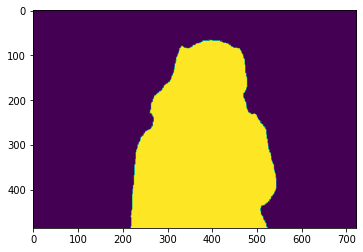

In [6]:
plt.imshow(img_mask)

In [14]:
# CRF 후처리 적용
crf_result = apply_crf(img_orig, img_mask)

![img5](images/img5.png)

In [18]:
# CRF 후처리 결과를 255와 0으로 바꿔줍니다
crf_result = (crf_result * 255).astype(np.uint8)

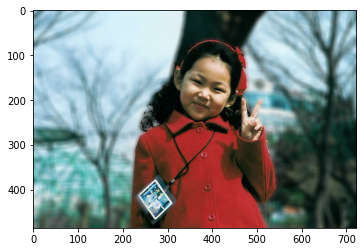

In [31]:
# 색상으로 바꾸기
color_mask = cv2.applyColorMap(crf_result, cv2.COLORMAP_JET)

# 원본 이미지와 마스크를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

# 배경 흐리게 하기
img_orig_blur = cv2.blur(img_orig, (13, 13))
img_mask_color = cv2.cvtColor(crf_result, cv2.COLOR_GRAY2BGR)

img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
img_concat = np.where(img_mask_color == 255, img_orig_blur, img_orig)

# 결과 시각화
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

- 머리랑 손가락이 성공적으로 뽑힌것을 볼 수 있다
- 하지만 시간과 메모리를 많이 잡아먹는 것으로 보인다

## 결론
- dense crf를 적용해서 머리카락이랑 손가락을 정교하게 뽑아낼 수 있었다.
- 하지만 시간이 오래걸리고 꽤나 복잡한 것 같다
- 인물사진을 정교화하게 만들기 위해 중심인물을 설정하고 instance segmentation까지 도전해봐서 좋은 경험이었다.